## ML vs DL
Machine Learning is a subset of Artificial Intelligence that uses statistical learning algorithms to build systems that have the ability to automatically learn and improve from experiences without being explicitly programmed.
- Supervised
- Unsupervised
- Reinforcement

Deep learning is a machine learning technique that is inspired by the way a human brain filters information, it is basically learning from examples. It helps a computer model to filter the input data through layers to predict and classify information. Since deep learning processes information in a similar manner as a human brain does, it is mostly used in applications that people generally do.
- CNNs
- RNNs


## Activation Functions

##### What are activation Functions?
1. Activation function defines the output of input or set of inputs or in other terms defines node of the output of node that is given in inputs.
2. Basically decide to deactivate neurons or activate them to get the desired output.
3. It also performs a nonlinear transformation on the input to get better results on a complex neural network.

## Types of activation functions

### 1. Binary Step
Threshold value to decide output that neuron should be activated or deactivated.

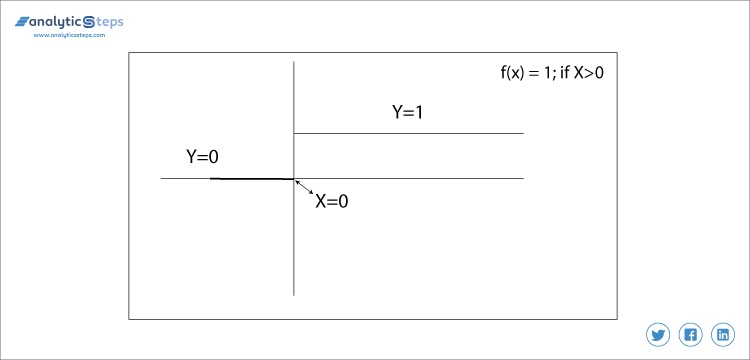

### 2. Linear 
It is a simple straight line activation function where the function is directly proportional to the weighted sum of neurons or input. Linear activation functions are better in giving a wide range of activations and a line of a positive slope may increase the firing rate as the input rate increases.

Y = mx

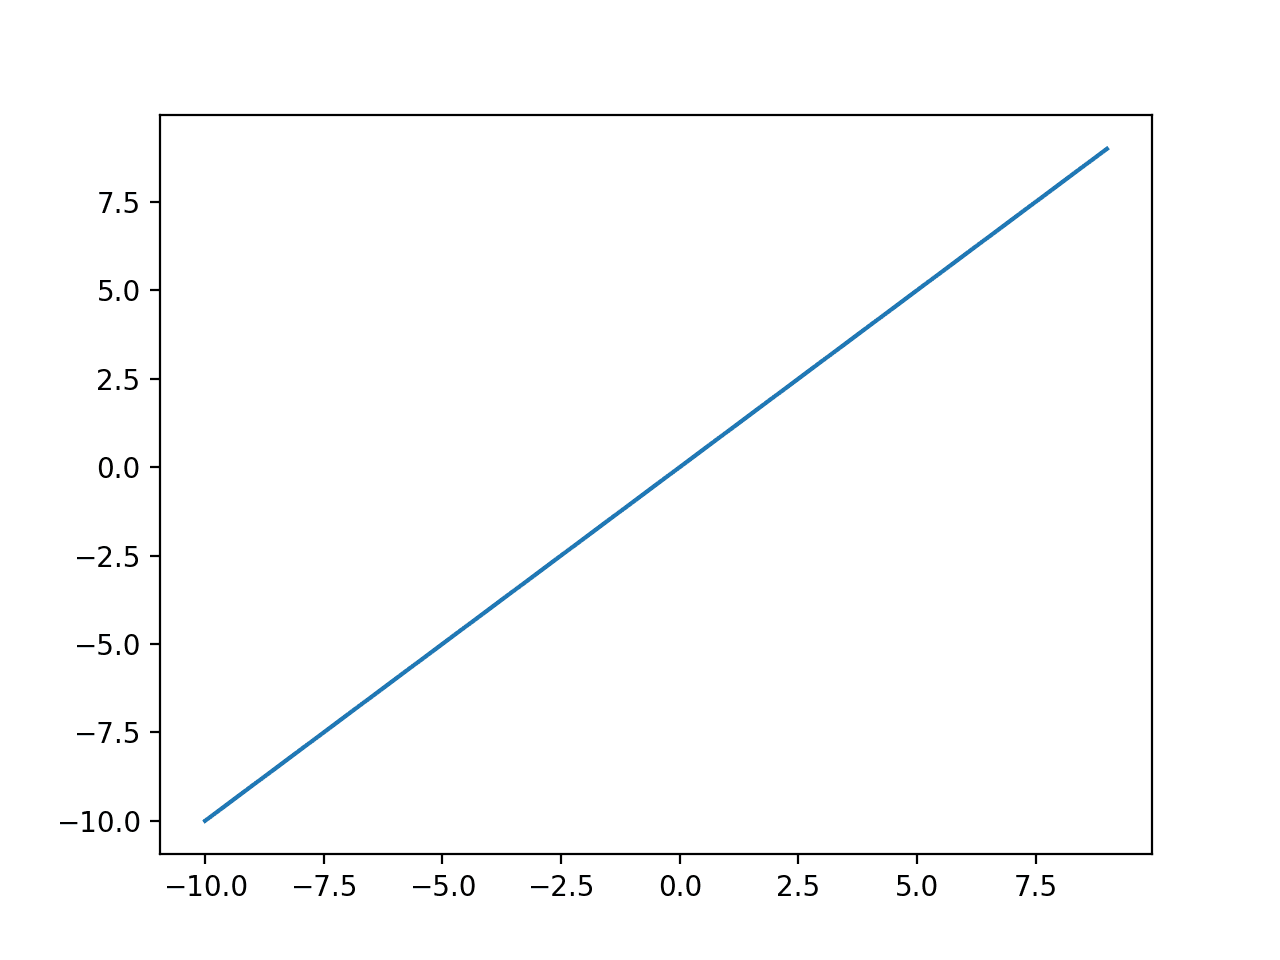

### 3. ReLU
Rectified linear unit or ReLU is most widely used activation function  which ranges from 0 to infinity, All the negative values are converted into zero, and this conversion rate is so fast that neither it can map nor fit into data properly which creates a problem, but where there is a problem there is a solution.



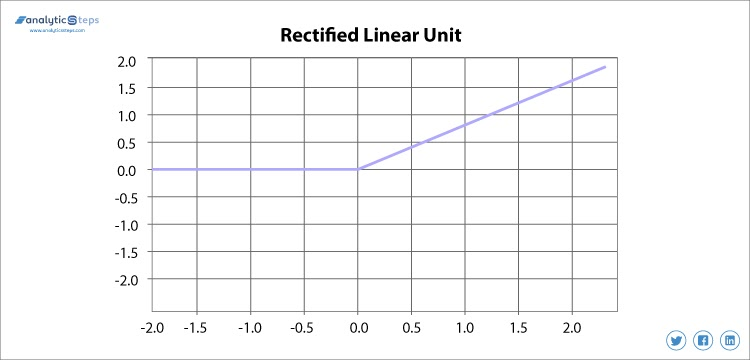

### 4. Leaky ReLU
We needed the Leaky ReLU activation function to solve the ‘Dying ReLU’ problem, as discussed in ReLU, we observe that all the negative input values turn into zero very quickly and in the case of Leaky ReLU we do not make all negative inputs to zero but to a value near to zero which solves the major issue of ReLU activation function.

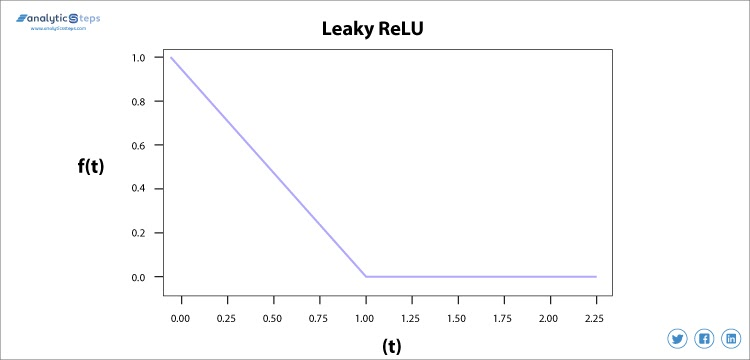

### 5. Sigmoid Activation Function
The sigmoid activation function is used mostly as it does its task with great efficiency, it basically is a probabilistic approach towards decision making and ranges in between 0 to 1, so when we have to make a decision or to predict an output we use this activation function because of the range is the minimum, therefore, prediction would be more accurate.


The equation for the sigmoid function is

 

f(x) = 1/(1+e(-x) )




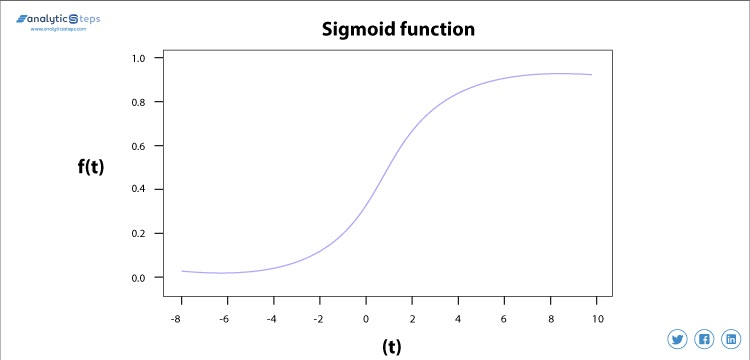

### 6. Hyperbolic Tangent 
This activation function is slightly better than the sigmoid function, like the sigmoid function it is also used to predict or to differentiate between two classes but it maps the negative input into negative quantity only and ranges in between -1 to  1.

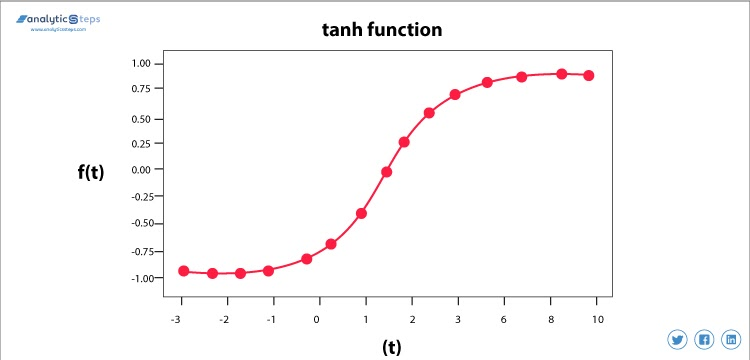

### 7. Softmax
Softmax is used mainly at the last layer i.e output layer for decision making the same as sigmoid activation works, the softmax basically gives value to the input variable according to their weight and the sum of these weights is eventually one.

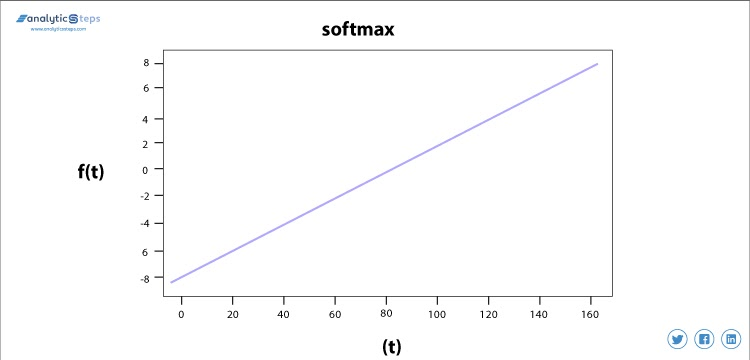

## Linear Regression

Linear regression is the process of estimating an unknown quantity based on some known ones (this is the regression part) with the condition that the unknown quantity can be obtained from the known ones by using only 2 operations: scalar multiplication and addition (this is the linear part). We multiply each known quantity by some number, and then we add all those terms to obtain an estimate of the unknown one.

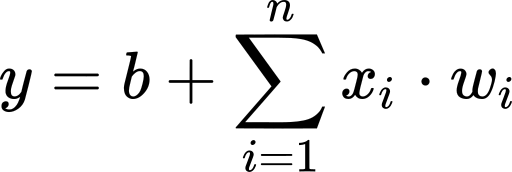

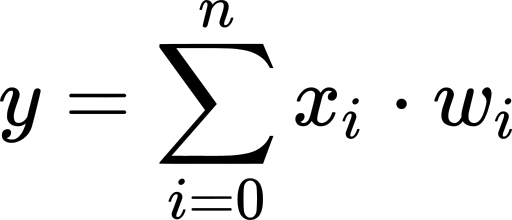

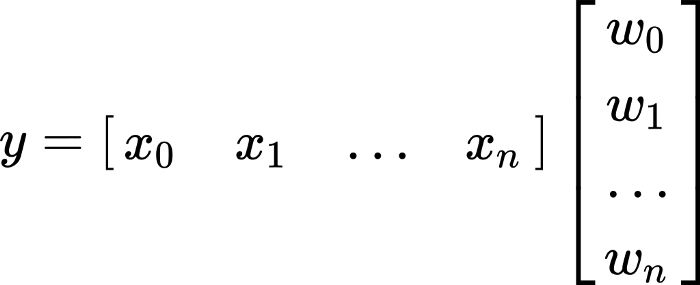

## Logistic Regression


* Linear Regression could help us predict the student’s test score on a scale of 0 - 100. Linear regression predictions are continuous (numbers in a range).
* Logistic Regression could help use predict whether the student passed or failed. Logistic regression predictions are discrete (only specific values or categories are allowed). We can also view probability scores underlying the model’s classifications.

### Types of Logistic Regression
- Binary (Pass/Fail)
- Multi (Cats, Dogs, Sheep)
- Ordinal (Low, Medium, High)


In [22]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])

clf.score(X, y)

[0 0]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.96

## SVM
The main objective of SVM is to find the optimal hyperplane which linearly separates the data points in two component by maximizing the margin .

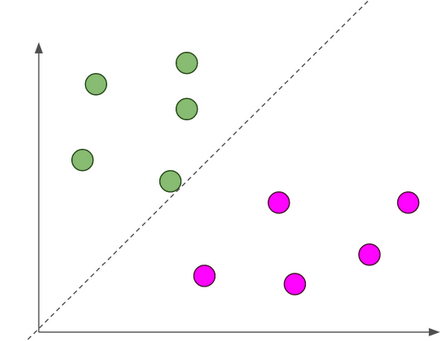

### - Vectors
Vectors are mathematical quantity which has both magnitude and direction. A point in the 2D plane can be represented as a vector between origin and the point.


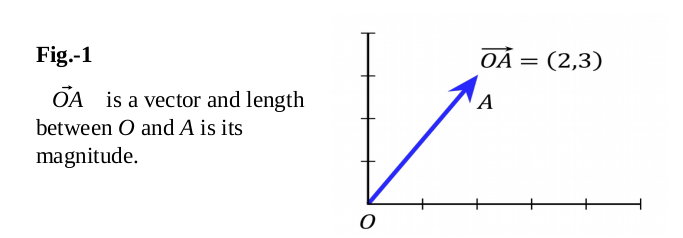

### - Hyperplane
It is plane that linearly divide the n-dimensional data points in two component. In case of 2D, hyperplane is line, in case of 3D it is plane.

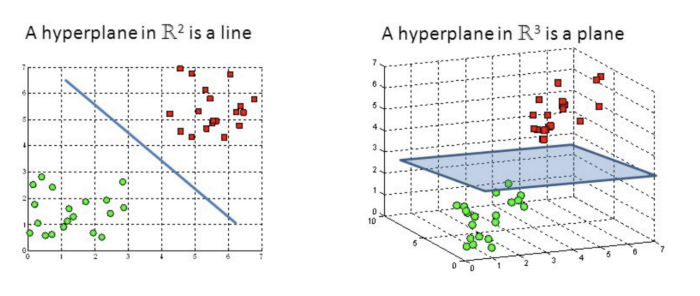


### - Dot Product
The dot product of two vectors returns a scalar. It gives us some insights into how the two vectors are related.





$$
x \cdot y = ||x||\space||y||\space cos(\theta)
$$

### - SVM Classsifier

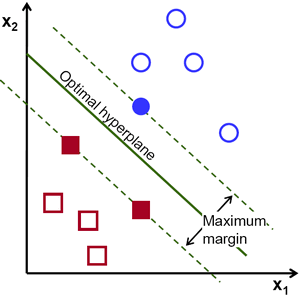



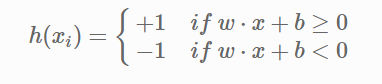

### -SVM with Kernel Trick
In SVMs, there can be a lot of new dimensions, each of them possibly involving a complicated calculation. Doing this for every vector in the dataset can be a lot of work. Here’s a trick: SVM doesn’t need the actual vectors to work its magic—it actually can get by with only the dot products between them.

z = x² + y²

a · b = xa · xb + ya · yb + za · zb
a · b = xa · xb + ya · yb + (xa² + ya²) · (xb² + yb²)


# DNN

In [29]:
import torch
import numpy as np

device = torch.device('cpu')

nn_input, hidden, nn_output = 3,5,2

inp = np.array([1,2,3])
out = np.array([2,3])
#Creating random tensors to hold input & output values
x = torch.Tensor(inp).to(device)
y = torch.Tensor(out).to(device)
#x = torch.randn(nn_input, device=device)
#y = torch.randn(nn_output, device=device)
print(x)
print(y)

tensor([1., 2., 3.])
tensor([2., 3.])


In [31]:
#Creating the model

model = torch.nn.Sequential(
          torch.nn.Linear(nn_input, hidden),
          torch.nn.ReLU(),
          torch.nn.Linear(hidden, nn_output),
        ).to(device)
print(model)

Sequential(
  (0): Linear(in_features=3, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=2, bias=True)
)


In [32]:
#loss function
loss_fn = torch.nn.MSELoss(reduction='sum')

In [33]:
learning_rate = 1e-4
for t in range(10):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    print(t, loss.item())
    model.zero_grad()
    loss.backward()
    
    #Backprop
    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate * param.grad

0 14.011252403259277
1 13.967632293701172
2 13.924242973327637
3 13.881084442138672
4 13.838154792785645
5 13.795448303222656
6 13.75296401977539
7 13.710700035095215
8 13.668651580810547
9 13.626819610595703


## DNN with IRIS dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

In [25]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x


In [26]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [27]:
import tqdm

EPOCHS  = 100
#Variables are used for automatic backprop
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(x_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 1386.04it/s]


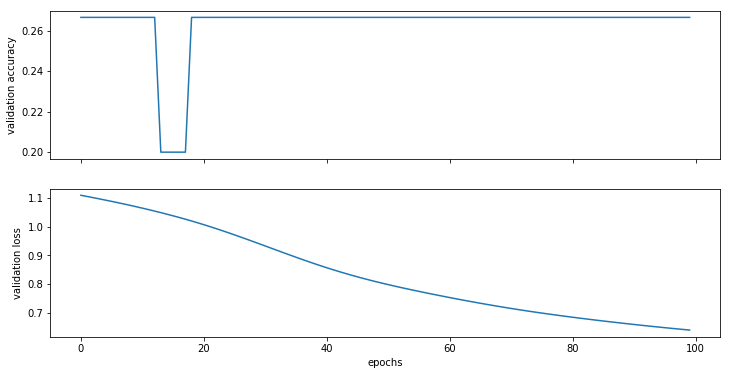

In [28]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

## Feed Forward NN
A Feed-Forward Neural Network is a type of Neural Network architecture where the connections are "fed forward", i.e. do not form cycles (like in recurrent nets).

The term "Feed forward" is also used when you input something at the input layer and it travels from input to hidden and from hidden to output layer.
The values are "fed forward"

$$
w_1a_1+w_2a_2+...+w_na_n = \text{new neuron}
$$

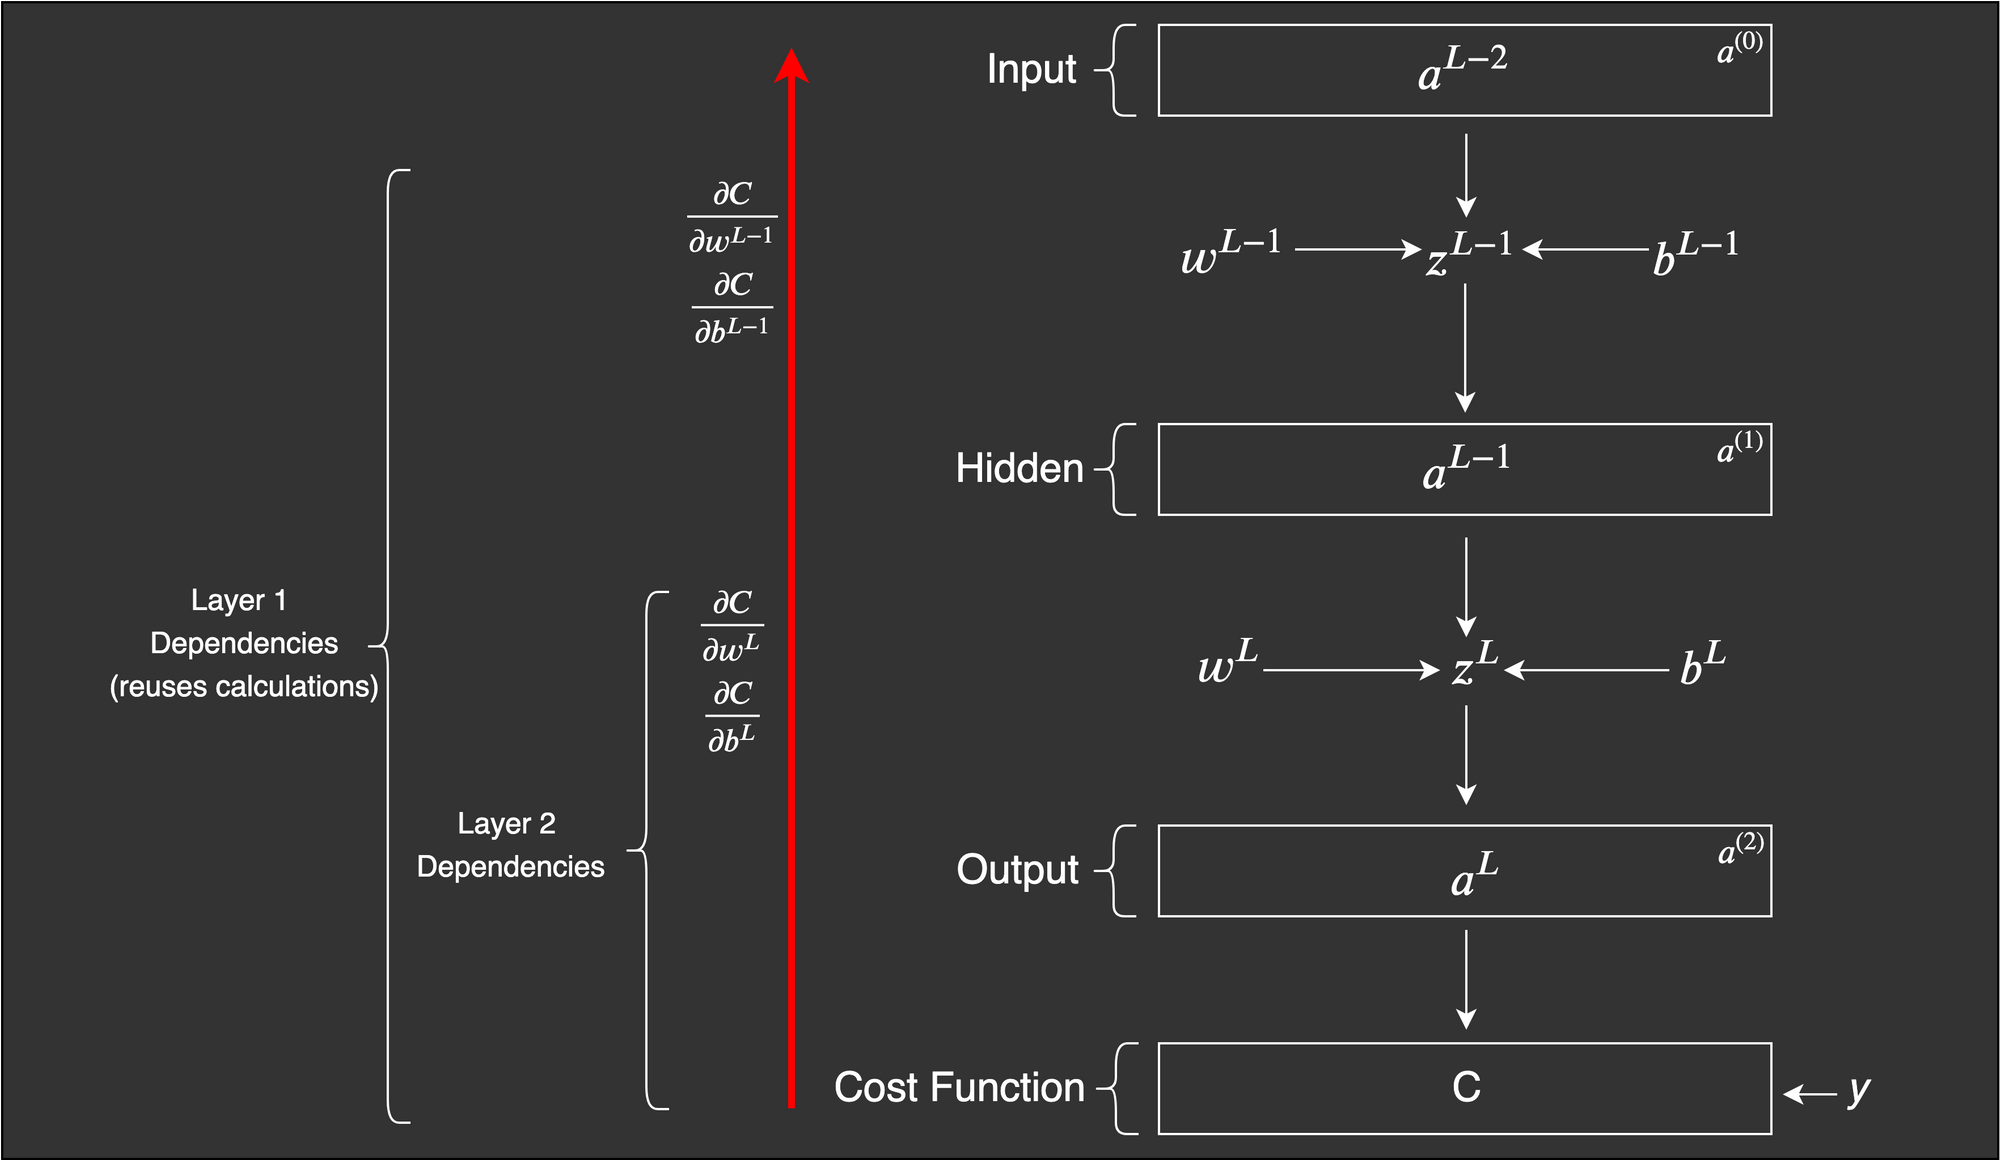

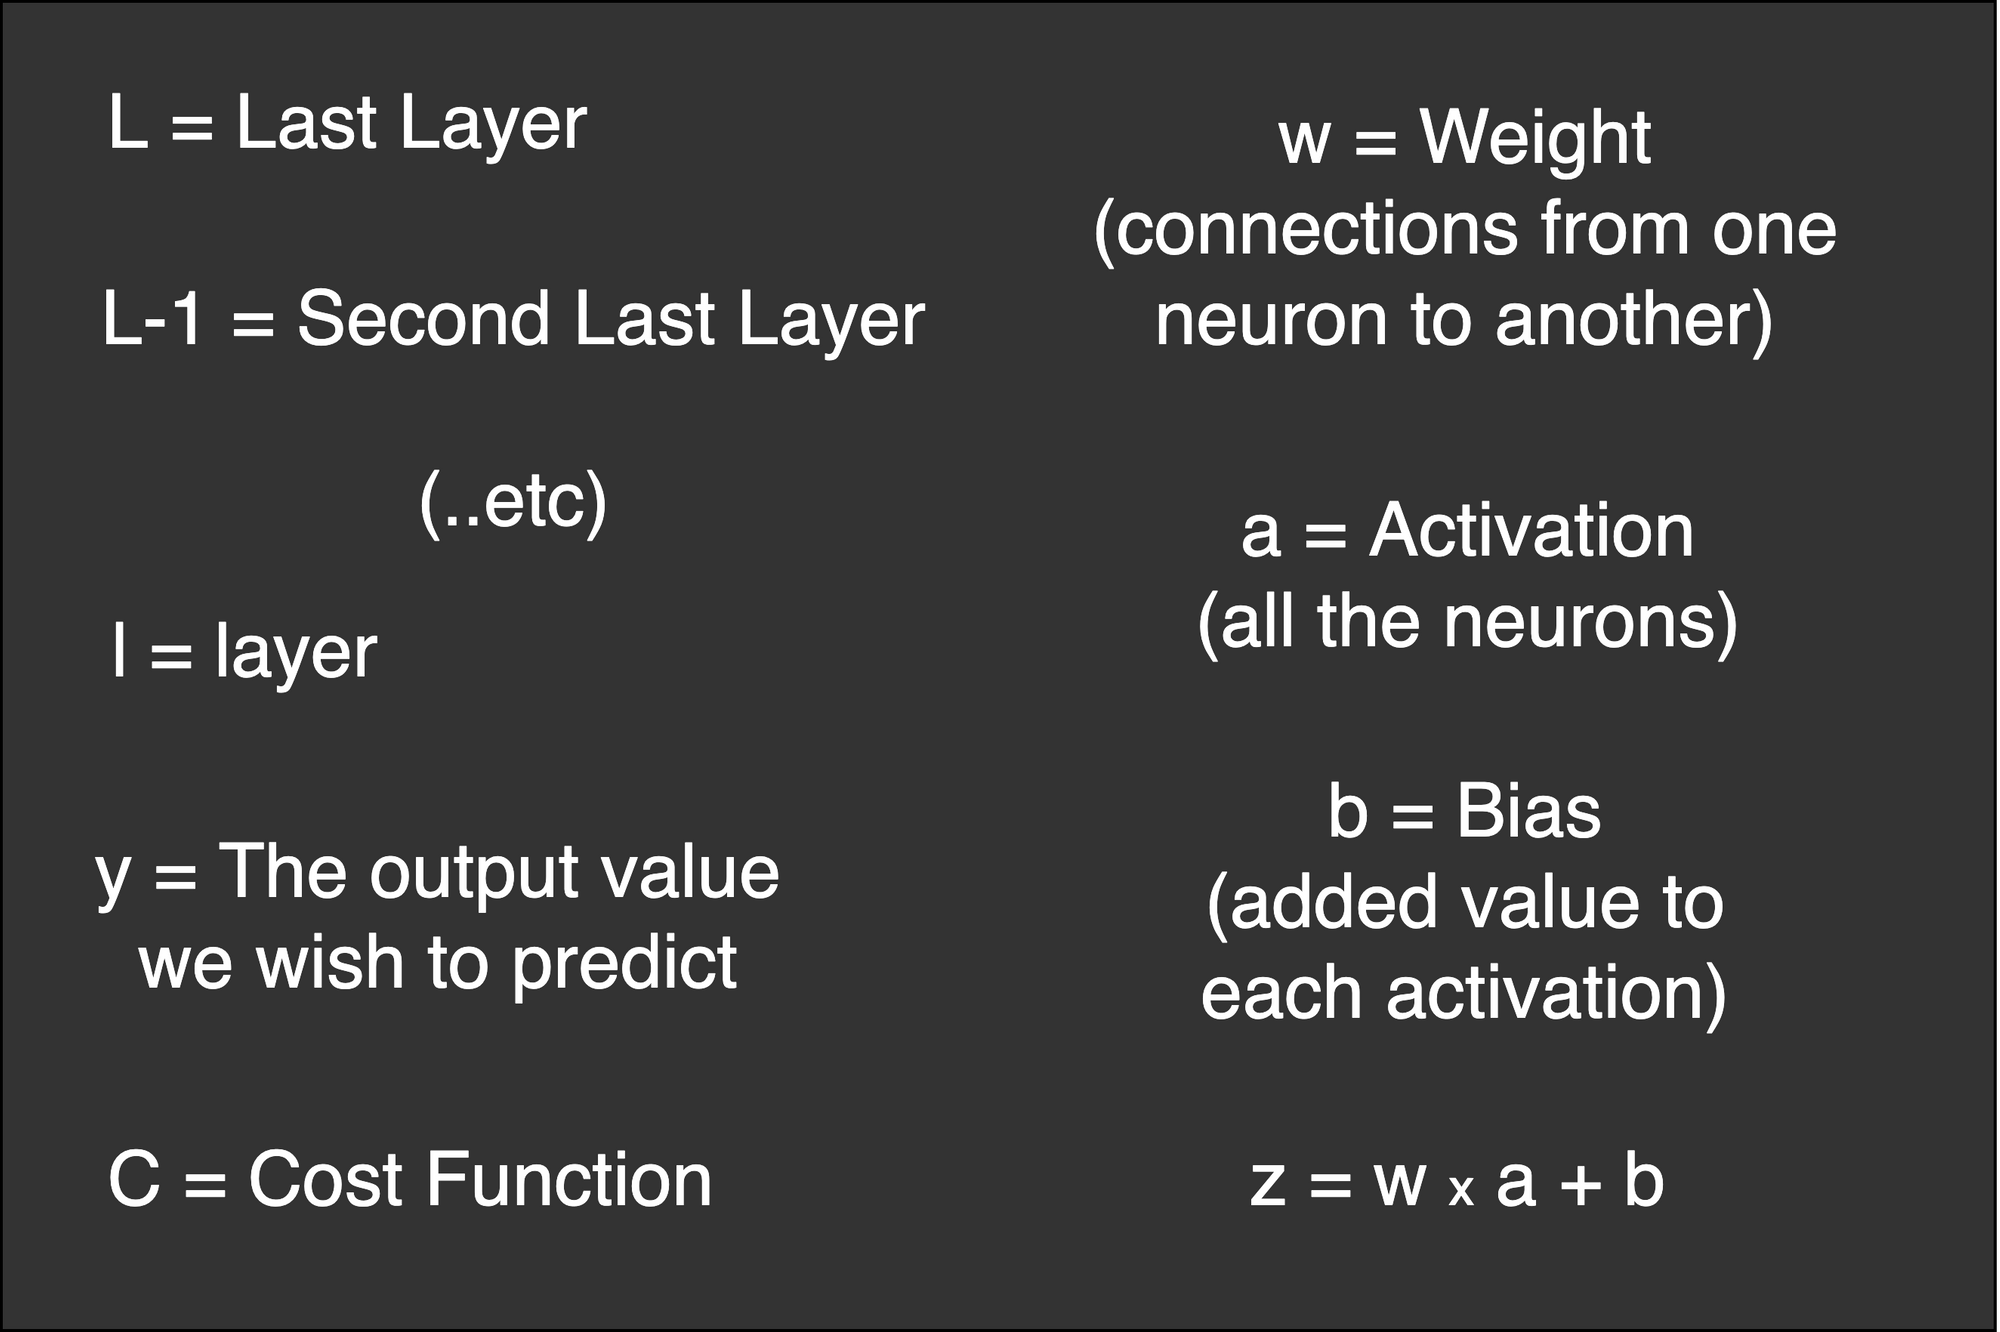

## Backprop
Backpropagation is a training algorithm consisting of 2 steps: 1) Feed forward the values 2) calculate the error and propagate it back to the earlier layers. So to be precise, forward-propagation is part of the backpropagation algorithm but comes before back-propagating.


$$
z^{(L)}=w^{(L)} \times a +b
$$

$$
a^{(L)}=
    \sigma\left(
    \boldsymbol{z}^{(L)}
    \right)
$$

$$
C=(a^{(L)}-y)^2   
$$

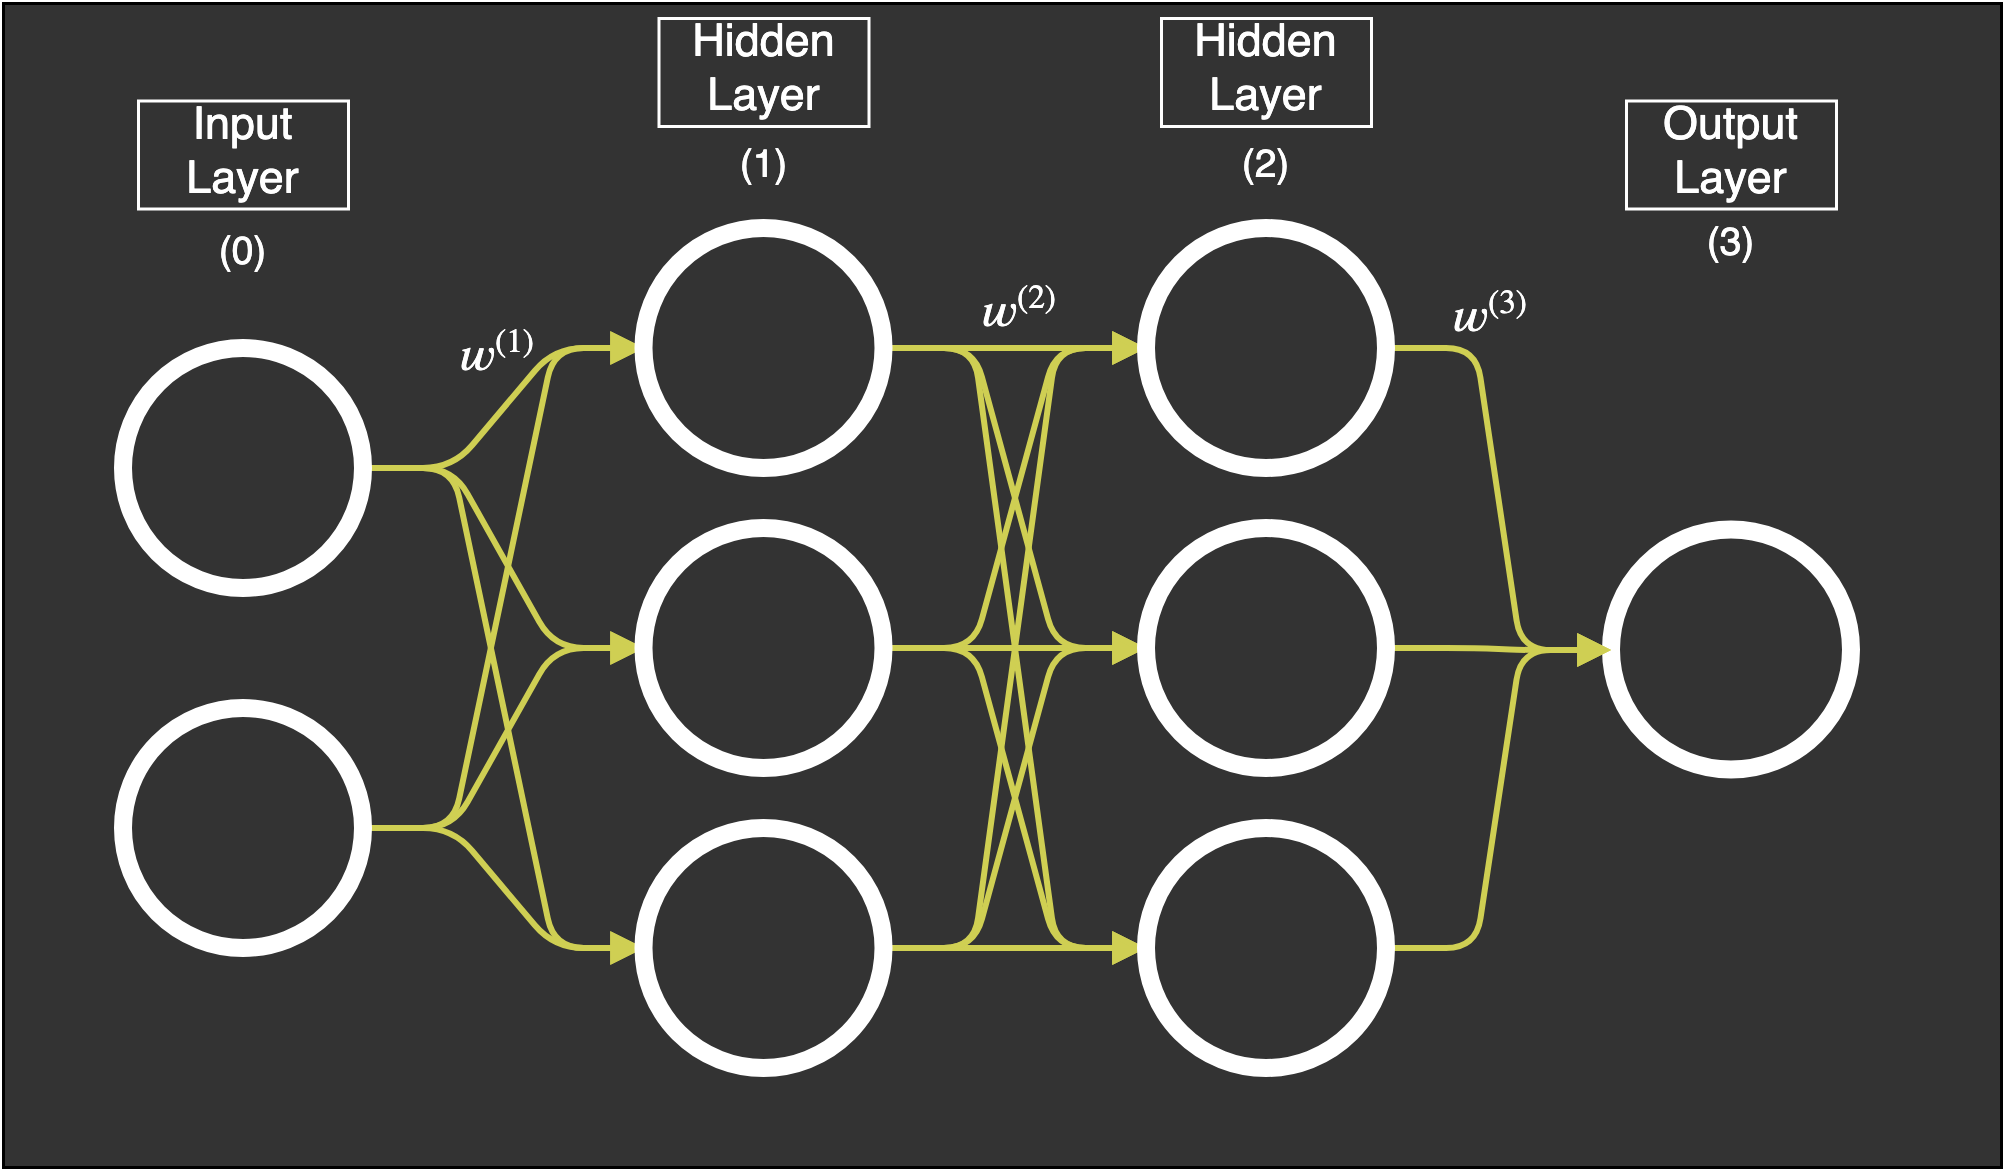

#### Forward Pass
$$
a^{(l)}=
    \sigma\left(
    \boldsymbol{W}\boldsymbol{a}^{l-1}+\boldsymbol{b}
    \right)
$$

#### Backward Pass
$$
\frac{\partial C}{\partial w^{(3)}}
    =
    \frac{\partial C}{\partial a^{(3)}}
    \frac{\partial a^{(3)}}{\partial z^{(3)}}
    \frac{\partial z^{(3)}}{\partial w^{(3)}}
$$

$$
\frac{\partial C}{\partial w^{(2)}}
    =
    \underbrace{
    \frac{\partial C}{\partial a^{(3)}}
    \frac{\partial a^{(3)}}{\partial z^{(3)}}
    }_\text{From $w^{(3)}$}
    \,
    \frac{\partial z^{(3)}}{\partial a^{(2)}}
    \frac{\partial a^{(2)}}{\partial z^{(2)}}
    \frac{\partial z^{(2)}}{\partial w^{(2)}}
$$

$$
\frac{\partial C}{\partial w^{(1)}}
    =
    \underbrace{
    \frac{\partial C}{\partial a^{(3)}}
    \frac{\partial a^{(3)}}{\partial z^{(3)}}
    }_\text{From $w^{(3)}$}
    \,
    \underbrace{
    \frac{\partial z^{(3)}}{\partial a^{(2)}}
    \frac{\partial a^{(2)}}{\partial z^{(2)}}
    }_\text{From $w^{(2)}$}
    \,
    \frac{\partial z^{(2)}}{\partial a^{(1)}}
    \frac{\partial a^{(1)}}{\partial z^{(1)}}
    \frac{\partial z^{(1)}}{\partial w^{(1)}}
$$

## Backprop example 


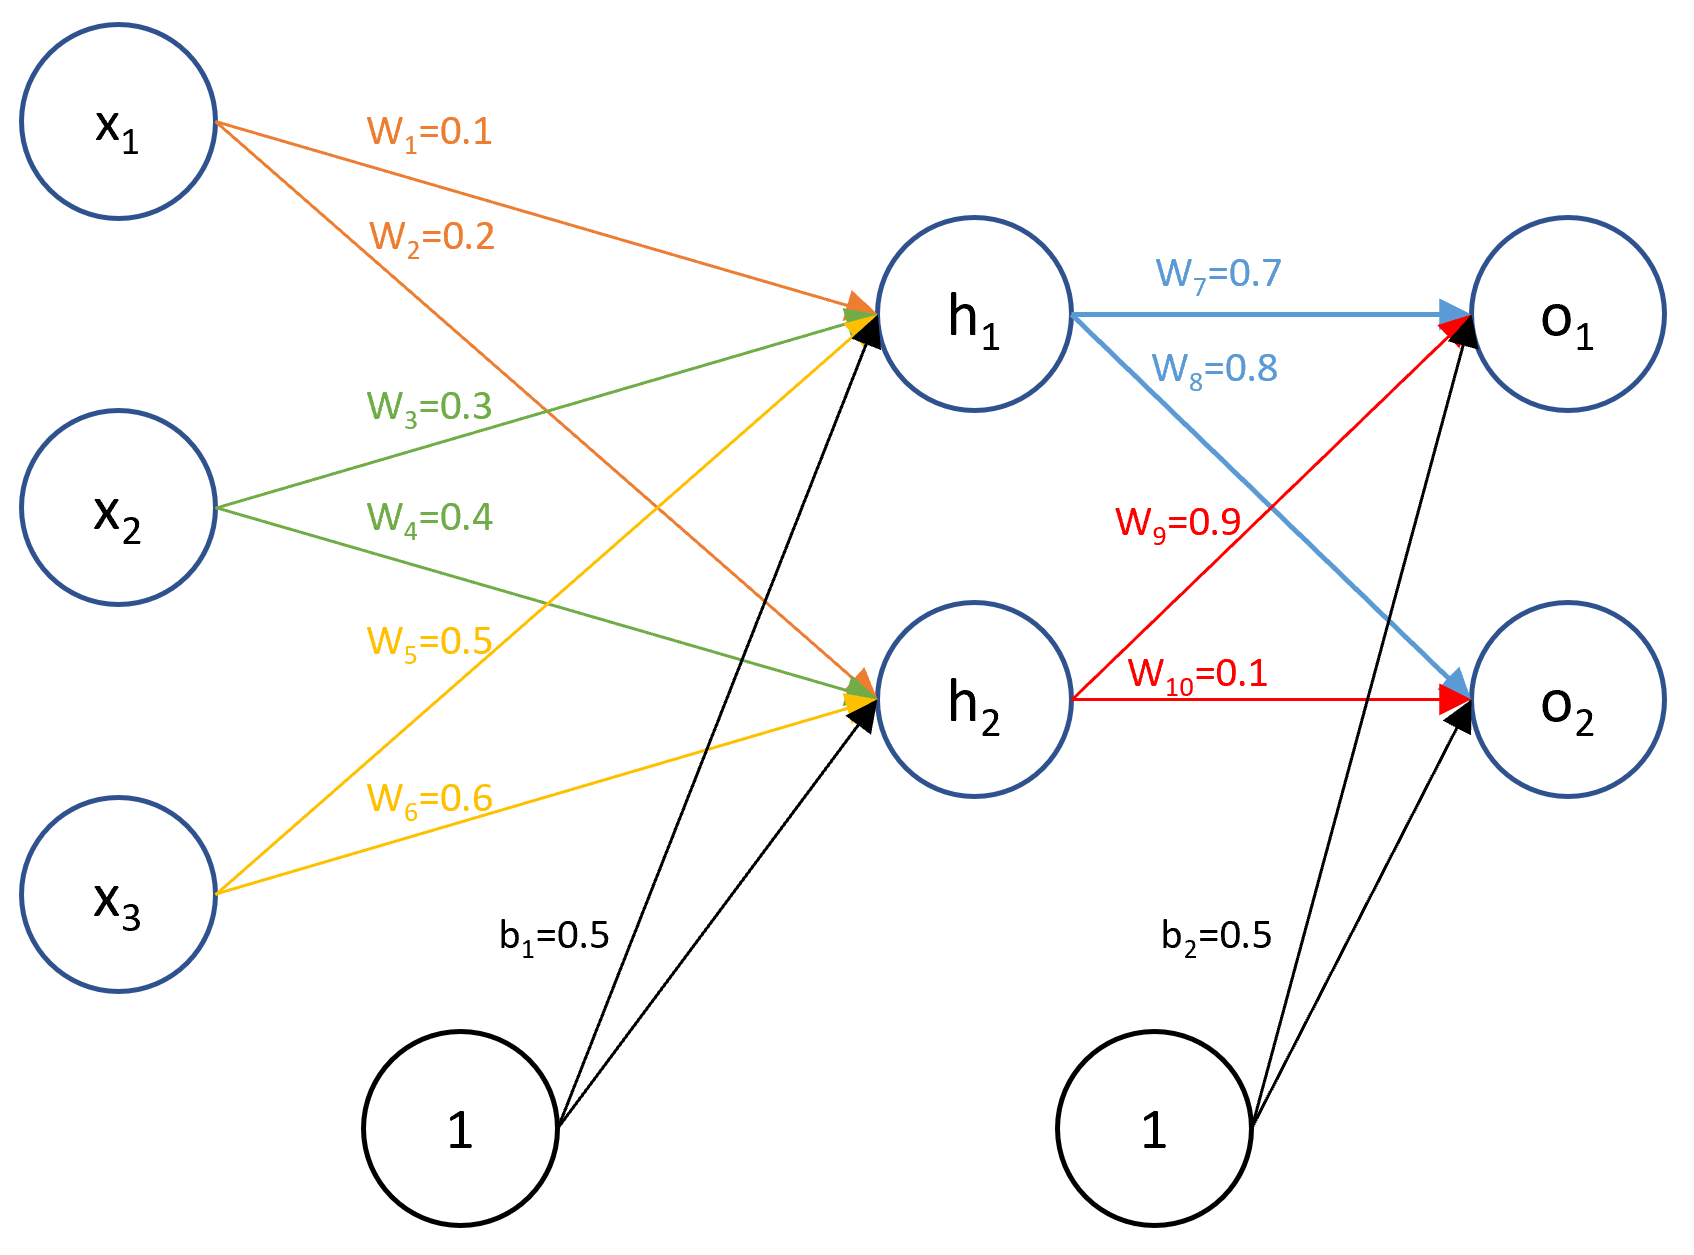

In [25]:
import numpy as np
import pandas as pd

In [37]:
# Initialize Variables 
w1 = 0.1 
w2 = 0.2 
w3 = 0.3 
w4 = w5 = w6 = 0.6 
w7 = 0.7 
w8 = 0.8 
w9 = 0.9 
w10 = 0.1 
wlist = [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10]
b1 = 0.5 
b2 = 0.5 
blist = [61, 62]

# Input and Target values 
x1 = 1 
x2 = 4 
x3 = 5 
xList = [x1, x2, x3]
t1 = 0.1 
t2 = 0.05 
tList = [t1, t2]

# set Learning rate 
alpha = 0.01
numIter = 1000

In [38]:
def sigmoid(x):
    return np.divide(1, 1 + np.exp(-x))

In [39]:
def forward_prop(xList, wlist, blist):
    zh1 = wlist[0] * xList[0] + wlist[2] * xList[1] + wlist[4] * xList[2] + blist[0]
    zh2 = wlist[1] * xList[0] + wlist[3] * xList[1] + wlist[5] * xList[2] + blist[0] 
    h1 = sigmoid(zh1) 
    h2 = sigmoid(zh2) 
    zol = wlist[6] * h1 + wlist[8] * h2 + blist[1] 
    zo2 = wlist[7] * h1 + wlist[9] * h2 + blist[1] 
    o1 = sigmoid(zol) 
    o2 = sigmoid(zo2) 
    return h1, h2, o1, o2


In [40]:
def error(olist, tlist):
    return (0.5 * np.power(olist[0] - tlist[0], 2) + np.power(olist[1] - tlist[1], 2))

In [45]:
errlist = [] 
for i in range(numIter):
    # Forward propagation 
    h1, h2, o1, o2 = forward_prop(xList, wlist, blist)
    # Compute Error 
    sse = error([o1, o2], tList) 
    errlist.append(sse)
    print('Running' + str(i + 1) + ' of ' + str(numIter)) 
    print('01: ' + str(o1)) 
    print('t1: ' + str(t1)) 
    print('02: ' + str(o2)) 
    print('t2: ' + str(t2)) 
    print('error: ' + str(sse)) 
    print('')
    # Error derivative calculations 
    # Compute dE_dw7 
    dE_do1 = o1 - t1 
    do1_dzo1 = o1 * (1-o1) 
    dzol_dw7 = h1 
    de_dw7 = dE_do1 * do1_dzo1 * dzol_dw7 
    # Compute dE_dw8 
    dE_do2 = o2 - t2 
    do2_dzo2 = o2 * (1 - o2) 
    dzo2_dw8 = h1 
    dE_dw8 = dE_do2 * do2_dzo2 * dzo2_dw8 
    # Compute de dw9 
    dzo1_dw9 = h2 
    de_dw9 = dE_do1 * do1_dzo1 * dzo1_dw9 
    # Compute dE_dw10 
    dzo2_dw10 = h2 
    de_dw10 = dE_do2 * do2_dzo2 * dzo2_dw10


Running1 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running2 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running3 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running4 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running5 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running6 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running7 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running8 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running9 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running10 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running11 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running12 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running13 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running14 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running15 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running16 of 1000
0

t2: 0.05
error: 1.3075

Running238 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running239 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running240 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running241 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running242 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running243 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running244 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running245 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running246 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running247 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running248 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running249 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running250 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running251 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running252 of 1000
01: 1.0
t1: 0.1
02:

error: 1.3075

Running452 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running453 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running454 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running455 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running456 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running457 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running458 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running459 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running460 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running461 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running462 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running463 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running464 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running465 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running466 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 

Running666 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running667 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running668 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running669 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running670 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running671 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running672 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running673 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running674 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running675 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running676 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running677 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running678 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running679 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running680 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3

01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running881 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running882 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running883 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running884 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running885 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running886 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running887 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running888 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running889 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running890 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running891 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running892 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running893 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running894 of 1000
01: 1.0
t1: 0.1
02: 1.0
t2: 0.05
error: 1.3075

Running895 of 

In [57]:
# Compute dE_db2 
dzo1_db2 = 1 
dzo2_db2 = 1 
dE_db2 = dE_do1 * do1_dzo1 * dzo1_db2 + dE_do2 * do2_dzo2 * dzo2_db2 
# Compute de_dh1 first 
dzo1_dh1 = w7 
dzo2_dh1 = w8 
de_dh1 = dE_do1 * do1_dzo1 * dzo1_dh1 + dE_do2 * do2_dzo2 * dzo2_dh1 
# Compute dE_dwl 
dh1_dzh1 = h1 * (1 - h1) 
dzh1_dw1 = x1 
dE_dw1 = de_dh1 * dh1_dzh1 * dzh1_dw1 
# Compute dE_dw3 
dzh1_dw3 = x2 
de_dw3 = de_dh1 * dh1_dzh1 * dzh1_dw3 
# Compute dE_dw5 
dzh1_dw5 = x3 
de_dw5 = de_dh1 * dh1_dzh1 * dzh1_dw5 
# Compute dE_dh2 first 
dzo1_dh2 = W9 
dzo2_dh2 = w10 
dE_dh2 = dE_do1 * do1_dzo1 * dzo1_dh2 + dE_do2 * do2_dzo2 * dzo2_dh2 
# Compute dE_dw2 
dh2_dzh2 = h2 * (1 - h2) 
dzh2_dw2 = x1 
de_dw2 = dE_dh2 * dh2_dzh2 * dzh2_dw2 
# Compute dE_dw4 
dzh2_dw4 = x2 
dE_dw4 = dE_dh2 * dh2_dzh2 * dzh2_dw4 
# Compute dE_dw6 
dzh2_dw6 = x3 
dE_dw6 = dE_dh2 * dh2_dzh2 * dzh2_dw6 
# Compute dE_db1 
dzh1_db1 = 1 
dzh2_db1 = 1 
term1 = dE_do1 * do1_dzo1 * dzo1_dh1 * dh1_dzh1 * dzh1_db1 
term2 = dE_do2 * do2_dzo2 * dzo2_dh2 * dh2_dzh2 * dzh2_db1 

dE_db1 = term1 + term2

In [59]:
# Update all parameters 
w1 = w1 - alpha * dE_dw1 
w2 = w2 - alpha * de_dw2 
w3 = w3 - alpha * de_dw3 
w4 = w4 - alpha * dE_dw4 
w5 = w5 - alpha * de_dw5 
w6 = w6 - alpha * dE_dw6 
w7 = w7 - alpha * de_dw7 
w8 = w8 - alpha * dE_dw8 
w9 = w9 - alpha * de_dw9 
w10 = w10 - alpha * de_dw10 
b1 = b1 - alpha * dE_db1 
b2 = b2 - alpha * dE_db2 
wlist = [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10] 
blist = [51, 52]


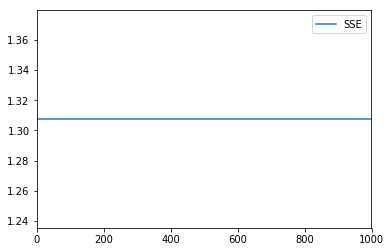

In [60]:
pd.DataFrame(errlist, columns = ['SSE']).plot()